# Distribución de probabilidad
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.


## Ejemplo: Selección  de miembros  del jurado.
+ Elegir al azar a 12 integrantes del jurado de una población en la que el 80% de miembros del jurado se seleccionan al azar sin sesgo
+ Si consideramos que x número de méxico-estadounidenses en un total de 12 miembros del jurado entonces x es una variable aleatoria porque su valor depende del azar. 
+ a. Los valores posibles de x son 0, 1, 2, . . . , 12. 
+ b. La tabla incluye los valores de x, junto con las probabilidades correspondientes. Los valores de probabilidad que son muy pequeños, como 0.000000123, están representados por 0  .
* Puesto que la tabla incluye la probabilidad para cada valor de la variable aleatoria x, esa tabla describe una distribución de probabilidad.
+ La figura es un histograma de probabilidad muy similar al histograma de frecuencias relativas, pero la escala vertical indica probabilidades en vez de frecuencias relativas basadas en resultados muestrales reales.

In [51]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

### Parametros

In [52]:
# Parámetros
# x variará de 1 a 12
n = 12    # Número de integrantes del jurado
p = 0.8   # Probabilidad de ser seleccionado


### Construcción de Tabla de datos
+ a. Calculos preliminares
+ b. Construcción del dataframe

In [53]:
# a. Calculos preliminares
# Calculo de las x
x = [ x for x in range(n+1)]

# Calculo de las probabilidades teóricas de cada valor
probabilidades = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista de probabilidades acumuladas
probacumuladas = list(accumulate(probabilidades))

# Observaciones previas para construir el dataframe
print(x)
print(probabilidades)
print(probacumuladas)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[4.095999999999992e-09, 1.9660799999999959e-07, 4.32537599999999e-06, 5.767167999999979e-05, 0.0005190451199999985, 0.0033218887679999946, 0.015502147583999985, 0.053150220287999976, 0.13287555071999987, 0.23622320127999996, 0.28346784153599996, 0.20615843020800004, 0.0687194767360001]
[4.095999999999992e-09, 2.0070399999999957e-07, 4.52607999999999e-06, 6.219775999999978e-05, 0.0005812428799999983, 0.003903131647999993, 0.01940527923199998, 0.07255549951999996, 0.20543105023999983, 0.4416542515199998, 0.7251220930559998, 0.9312805232639999, 1.0]


In [54]:
# b. Construcción del data frame directamente desde los parametros
df_miembros = pd.DataFrame(
    {
        'x': [x for x in range(n+1)],
        'Probabilidad': [binom.pmf(x, n, p) for x in range(n + 1)],
        'x.p': [x * binom.pmf(x, n, p) for x in range(n + 1)],
        'xx.p': [x ** 2 * binom.pmf(x, n, p) for x in range(n + 1)],
        'Prob-Acum': list(accumulate(probabilidades))
    },
)
df_miembros.set_index('x')

,Probabilidad,x.p,xx.p,Prob-Acum
x,,,,
0,4.096000e-09,0.000000e+00,0.000000e+00,4.096000e-09
1,1.966080e-07,1.966080e-07,1.966080e-07,2.007040e-07
2,4.325376e-06,8.650752e-06,1.730150e-05,4.526080e-06
3,5.767168e-05,1.730150e-04,5.190451e-04,6.219776e-05
4,5.190451e-04,2.076180e-03,8.304722e-03,5.812429e-04
5,3.321889e-03,1.660944e-02,8.304722e-02,3.903132e-03
6,1.550215e-02,9.301289e-02,5.580773e-01,1.940528e-02
7,5.315022e-02,3.720515e-01,2.604361e+00,7.255550e-02
8,1.328756e-01,1.063004e+00,8.504035e+00,2.054311e-01


### Visualización 
Utilizando seaborn objects

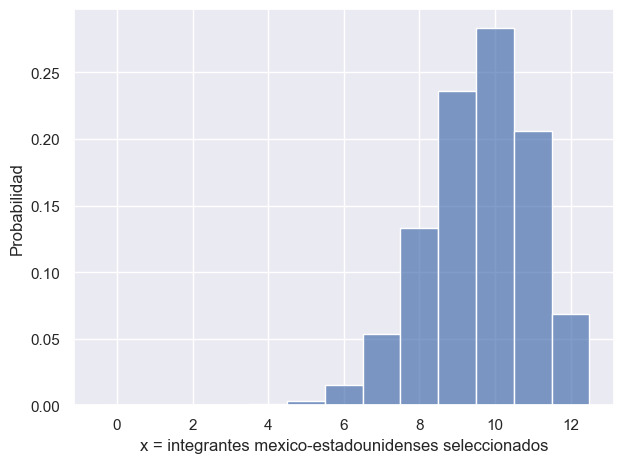

In [55]:
# Visualización con Seaborn Objects
# Crear la figura y los ejes
plot = (
    so.Plot(df_miembros, x="x", y="Probabilidad")
    .add(so.Bars(),)
    .label(x="x = integrantes mexico-estadounidenses seleccionados", y="Probabilidad")
)


# Mostrar el gráfico
plot.show()

### Revisión de estadísticos de la distribución de Probabilidad
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

In [56]:
# Calculo de la media de la distribución de probabilidad
print(f"Totales de tabla:\n{df_miembros.sum()}\n")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_miembros.Probabilidad.sum()
media = df_miembros['x.p'].sum()
sum_xx_p = df_miembros['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media    : {media}")
print(f"Varianza : {sum_xx_p} - {media}**2 = {varianza}")
print(f"Desviación Estandard: {desvstan}")

Totales de tabla:
x               78.00
Probabilidad     1.00
x.p              9.60
xx.p            94.08
Prob-Acum        3.40
dtype: float64

Sumatoria de probabilidades: 1.0
Media    : 9.6
Varianza : 94.08 - 9.6**2 = 1.9200000000000017
Desviación Estandard: 1.3856406460551025


#### Revisión de Estadisticos por SciPy
La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt

In [57]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [58]:
mean, var, skew, kurt

(9.600000000000001, 1.92, -0.4330127018922194, 0.020833333333333353)

### Identificación de resultados poco comunes con la regla práctica del intervalo
+ La regla práctica del intervalo (que se estudia en estadística descriptiva) resulta útil para interpretar los valores de una desviación estándar.
+ Regla práctica del intervalo
    + valor máximo común  : media  + dos desvios estandard.
    + valor mínimo común   : media - dos desvíos estandard.

In [59]:
# Calculos de valores minimo y máximo comunes 
# dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Valor mínimo común: {val_min_comun} y Valor máxio común: {val_max_comun}")
print(f"Los valores más probables de x están entre {val_min_comun} y {val_max_comun}")


Valor mínimo común: 6.828718707889795 y Valor máxio común: 12.371281292110204
Los valores más probables de x están entre 6.828718707889795 y 12.371281292110204


**Interpretación**: Con base en estos resultados, concluimos que, para grupos de 12 miembros del jurado elegidos al azar en el condado de Hidalgo, el número de méxico-estadounidenses debe caer entre 6.8 y 12.4. Si un jurado consta de 7 méxico-estadounidenses, no se trata de un suceso poco común y no serviría como base para afirmar que el jurado se eligió de una manera que discrimina a los méxico-estadounidenses. (El jurado que sentenció a Roger Partida incluyó a 7 méxico-estadounidenses, pero la acusación de un proceso de selección injusto se basó en el proceso utilizado para seleccionar al Gran Jurado y no al jurado específico que lo sentenció).

### Uso de las probabilidades para determinar resultados infrecuentes
###### Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
###### Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
######    *El valor de 0.05 se utiliza de forma regular, pero no es absolutamente rígido. Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.
Si el 80% de  las personas que pueden fungir como miembros del jurado en el condado de Hidalgo son méxico-estadounidenses, entonces un jurado de 12 individuos seleccionados al azar debe incluir 9 o 10 méxico-estadounidenses. (La media del número de méxico-estadounidenses en los jurados es de de 9.6). 
+ ¿Siete jueces méxico-estadounidenses, de un total de 12, es un número excepcionalmente bajo? 
+ ¿La selección de sólo 7 méxico-estadounidenses en un total de 12 miembros del jurado sugiere que existe discriminación en el proceso de selección?
* Usaremos el criterio de que 7 méxico-estadounidenses en un total de 12 miembros del jurado es excepcionalmente bajo si P(7 o menos méxico-estadounidenses) <= 0.05. Si nos remitimos a la tabla obtenemos el siguiente resultado:
+ P(7 o menos méxico-estadounidenses en un total de 12 miembros del jurado) =
+ P(7 o 6 o 5 o 4 o 3 o 2 o 1 o 0) = P(7) + P(6) + P(5) + P(4) + P(3) + P(2) + P(1) + P(0) = 0.053 + 0.016 + 0.003 + 0.001 + 0 + 0 + 0 + 0 =
+ P(7 o menos méxico-estadounidenses en un total de 12 miembros del jurado) = 0.073
* Esto es la probabilidad acumulada de 1 a 7

In [60]:
# Calculo de la probabilidad acumulada P(<=7)
prob7 = df_miembros[df_miembros.x <=7 ].Probabilidad.sum()

# Impresión de resultados
print(f"Probabilidad de seleccionar 7 de 12 miembros del jurado mexico-estadounidenses: {prob7}")


Probabilidad de seleccionar 7 de 12 miembros del jurado mexico-estadounidenses: 0.07255549951999996


Interpretación: Puesto que la probabilidad de 0.073 es mayor que 0.05, concluimos:
+ que el resultado de 7 méxico-estadounidenses no es poco común. 
+ Existe una alta probabilidad (0.073) de seleccionar a 7 méxico-estadounidenses por azar. 
+ (Sólo una probabilidad de 0.05 o menor indicaría que el suceso es poco común). 
* Ningún tribunal de justicia declararía que, en esas circunstancias, la selección de sólo 7 méxico-estadounidenses es discriminatoria.

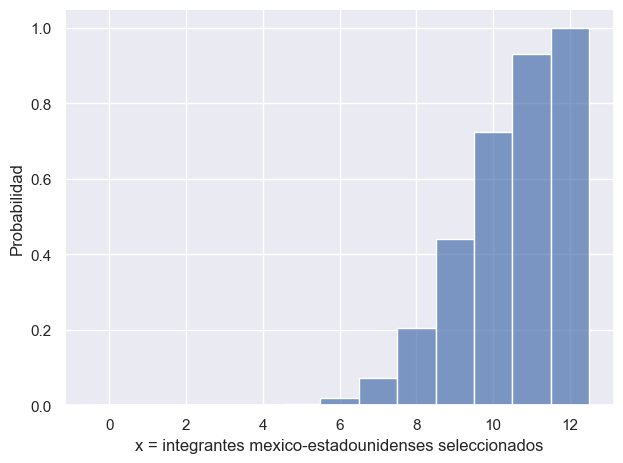

In [61]:
# Visualización con Seaborn Objects
# Crear la figura y los ejes
plot = (
    so.Plot(df_miembros, x="x", y="Prob-Acum")
    .add(so.Bars())
    .label(x="x = integrantes mexico-estadounidenses seleccionados", y="Probabilidad")
)


# Mostrar el gráfico
plot.show()

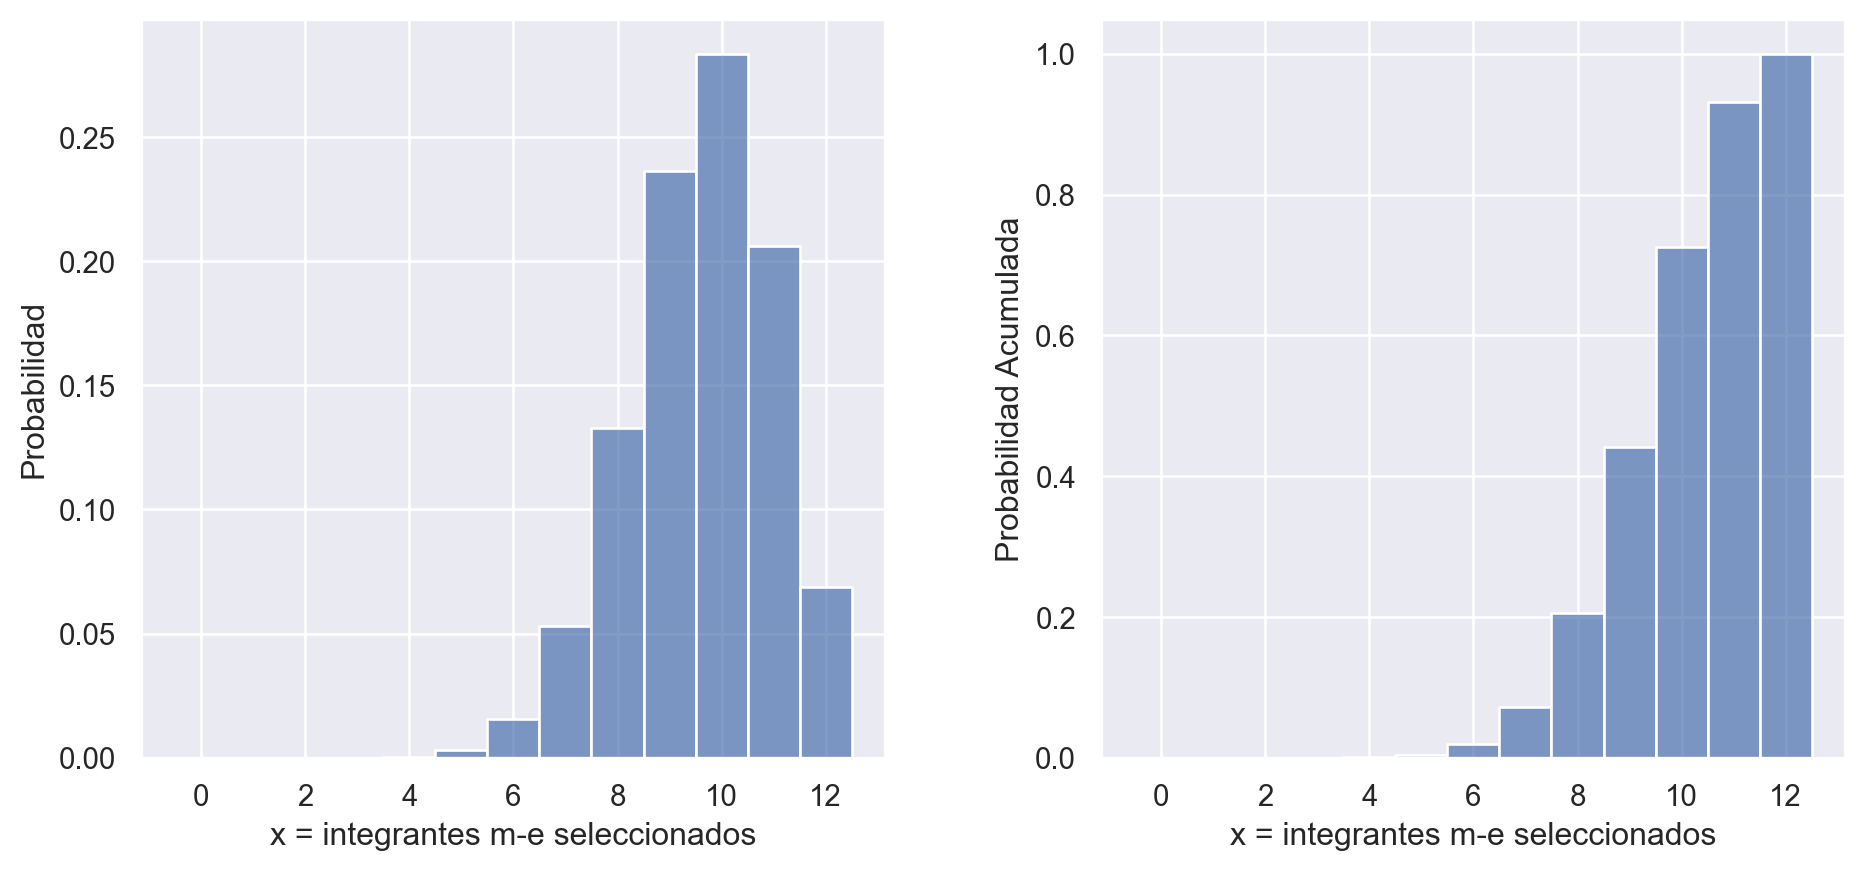

In [62]:
f = mpl.figure.Figure(figsize=(10, 5))
sf1, sf2 = f.subfigures(1, 2)
# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="Probabilidad")
    .add(so.Bars(),)
    .label(x="x = integrantes m-e seleccionados", y="Probabilidad")
    .on(sf1)
    .plot()
)
# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="Prob-Acum")
    .add(so.Bars())
    .label(x="x = integrantes m-e seleccionados", y="Probabilidad Acumulada")
    .on(sf2)
)